In [8]:
import pandas as pd
import numpy as np

In [9]:
raw_df = pd.read_csv('./friends_info.csv')

## Dates

In [10]:
from datetime import datetime, date

In [11]:
raw_df['Date1'] = pd.to_datetime(raw_df['Date'])

In [12]:
raw_df['Date1'].isna().sum() #No NaN

0

## Episodes

In [13]:
raw_df['Episode'].replace({"Special":"10-100"})

0         01-01
1         01-02
2         01-03
3         01-04
4         01-05
         ...   
224       10-14
225       10-15
226       10-16
227      10-100
228    10-17-18
Name: Episode, Length: 229, dtype: object

In [14]:
raw_df['Season'] = raw_df['Episode'].str[0:2]

In [15]:
raw_df['Episode/s']=raw_df['Episode'].str[3:]

In [16]:
modified_data = raw_df[raw_df['Episode'] != "Special"]

## Ranking/Share

In [17]:
modified_data[['Rating','Share']] = raw_df['Rating/Share'].str.split('/', expand=True)

/opt/miniconda3/envs/Friends_env/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Drop columns

In [18]:
list(modified_data.columns)

['Date',
 'Episode',
 'Title',
 'Directed by',
 'Written by',
 'Duration',
 'Summary',
 'Rating/Share',
 'U.S. viewers',
 'Prod.\r\ncode',
 'Date1',
 'Season',
 'Episode/s',
 'Rating',
 'Share']

In [19]:
to_drop = ['Episode','Date', 'Rating/Share', 'Prod.\r\ncode']

In [20]:
modified_data.drop(columns=to_drop, inplace=True)

/opt/miniconda3/envs/Friends_env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
modified_data.columns

Index(['Title', 'Directed by', 'Written by', 'Duration', 'Summary',
       'U.S. viewers', 'Date1', 'Season', 'Episode/s', 'Rating', 'Share'],
      dtype='object')

In [22]:
modified_data2 = modified_data.rename(columns={'Date1': 'Date'})

In [23]:
modified_data2.set_index('Date', inplace=True)

## Views

In [31]:
modified_data2[['Views (In Millions)','Units']] = modified_data2['U.S. viewers'].str.split(" ", expand=True)

In [34]:
to_drop2 = ['U.S. viewers', 'Units']
modified_data2.drop(columns=to_drop2, inplace=True)

In [35]:
modified_data2.to_excel('./tableau_data.xlsx')

# Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


netflix.groupby("country")["show_id"].count()

In [26]:
directors = modified_data2.groupby("Directed by")["Episode/s"].count().reset_index().sort_values(by = "Episode/s", ascending = False)[:10]

## Top Directors

<AxesSubplot:xlabel='Episode/s', ylabel='Directed by'>

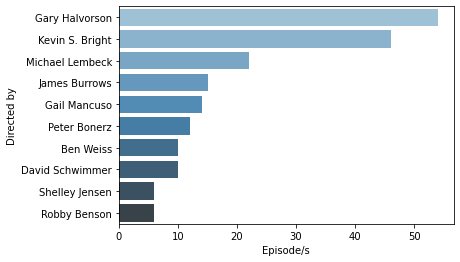

In [27]:
sns.barplot(y=directors['Directed by'], x=directors['Episode/s'], palette = "Blues_d")

Gary Holvorson and Kevin S.Bright have been the directors who participated in more chapters. 

## Top 10 popular episodes

In [69]:
Top_10 = modified_data2.groupby("Title")["Views (In Millions)"].sum().reset_index().sort_values(by = "Views (In Millions)", ascending = False)[:10]
Top_10

,Title,Views (In Millions)
5,The One After the Super Bowl,52.9
0,The Last One,52.46
37,The One Where Rachel Has a Baby,34.91
29,The One Where No One Proposes,34.01
201,The One with the Prom Video,33.6
53,The One Where Ross and Rachel... You Know,32.9
191,The One with the List,32.9
133,The One with Russ,32.2
126,The One with Ross's New Girlfriend,32.1
1,"The One After ""I Do""",31.70
